__<h1 style='text-align: center;'> Sluttfarten til en kule i en rullebane </h1>__
<h4 style='text-align: center;'>N. M. Meland, L. B. Dahl, O. H. Hansen, J. O. Karlsen, O. P. Rasmussen, M. Presthagen</h4>

_<p style='text-align: center;'>Institutt for fysikk, Norges teknisk-naturvitenskapelige universitet, 7491 Trondheim.</p>_



***
### __Sammendrag__

Rapporten forklarer de fysiske kreftene som virker på en kule i en rullebane med varierende krumning. Banen er generert
med Scipys interpoleringsfunksjon Cubicspline. Størrelsene er beregnet ved hjelp av Python for både numeriske verdier og
for eksperimentell data, før resultatene for sluttfart, tidsbruk og friksjonskraft i forhold til normalkraft er blitt undersøkt
og presentert. Numerisk utregning ga sluttfart 0.95 m/s, mens forsøkene beregnet den gjennomsnittlige sluttfarten til
0.81 ± 0.02 m/s. Eksperimentell slutthastighet avviker noe fra den numerisk beregnede. Avviket kan for eksempel skyldes
feil relatert til målingene gjort i Tracker, menneskelige feil i gjennomførelsen av forsøket eller metodiske feil i beregningene.
***

### __1. Introduksjon__

Dette prosjektet har gått ut på å studere en kule som ruller, uten glidning ned en bane. Banen ble konstruert med åtte punkter plassert i jevne avstander på 0,2 meter. Hvert punkt hadde en distinkt høyde, men oversteg aldri startpunktets høyde på 0,3 meter. Med banen som grunnlag, anvendte vi teoretiske formler til å beregne tidsavhengige funksjoner for farten, helningsvinkelen, normalkraften og friksjonskraften. Videre ble ti eksperimentelle forsøk gjennomført. Disse ble benyttet til sammenligning til de teoretiske beregningene.

### __2. Teori__

Her kommer det teori

### __3. Metode__

Her kommer masse gode metoder

### __4. Resultater__

Her kommer resultater

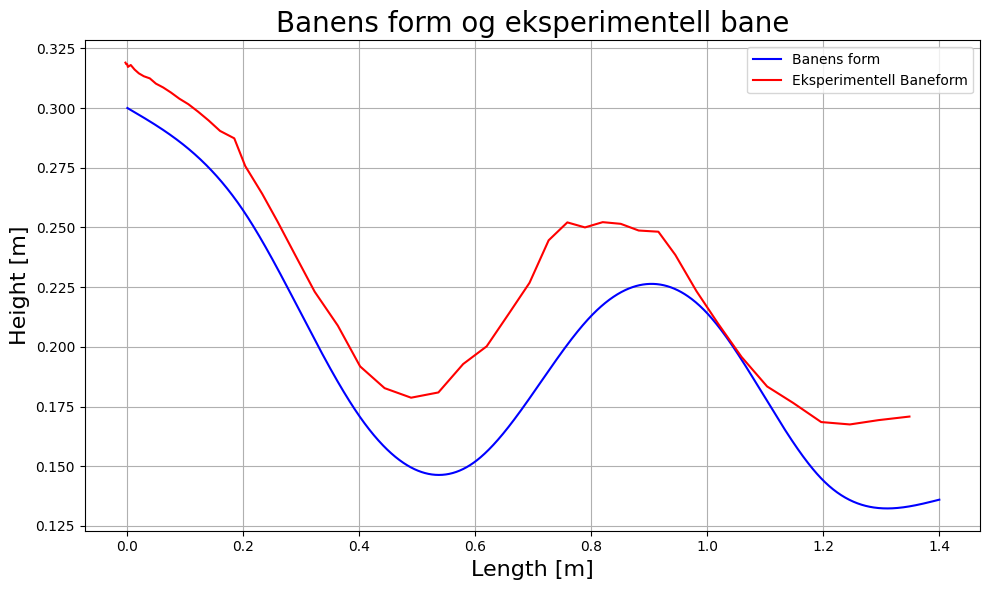

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

# Code for "Banens form"
h = 200
xfast = np.asarray([0, 1, 2, 3, 4, 5, 6, 7]) * h / 1000  # Convert to meters
xmin = 0
xmax = 1.401  # Convert to meters
dx = 0.001  # Convert to meters
x = np.arange(xmin, xmax, dx)
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136]) / 1000  # Convert to meters
cs = CubicSpline(xfast, yfast, bc_type='natural')
y = cs(x)
dy = cs(x, 1)
d2y = cs(x, 2)

# Experimental data (kept in millimeters)
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])   # Convert to meters
y_exp = np.array(data['y'])  # Keep y_exp in millimeters
v_exp = np.array(data['v'])  # Already in m/s

# Create a single figure for both plots
plt.figure(figsize=(10, 6))

# Plot "Banens form" in blue
plt.plot(x, y, label='Banens form', color='blue')

# Plot the experimental data in red
plt.plot(x_exp, y_exp, label='Eksperimentell Baneform', color='red')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Height [m]', fontsize=16)
plt.title('Banens form og eksperimentell bane', fontsize=20)
plt.grid()
plt.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

# You can continue with the velocity calculation and plotting, which remains the same as before.


<Figure size 1200x600 with 0 Axes>

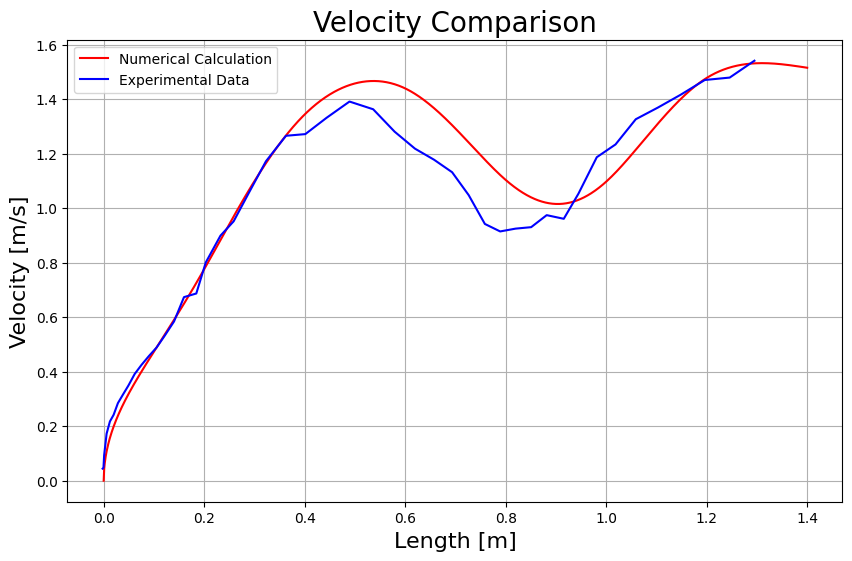

4.9874040000000007e-08


In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

h = 200/1000
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)/1000
#Skruehøyder:
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136])
cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)
baneform = plt.figure('y(x)',figsize=(12,6))
# Your code for calculating and plotting velocity
c = 2/5
g = 9810
y0 = 300
vy = np.sqrt((2 * g * (y0 - y)) / (1 + c))/1000

# Experimental data
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])  # Convert x_exp from meters to millimeters
y_exp = np.array(data['y'])  # Convert y_exp from meters to millimeters
v_exp = np.array(data['v'])  # Convert v_exp from m/s to mm/s

# Create a single figure for both plots
plt.figure(figsize=(10, 6))

# Plot the numerical calculation of velocity in red
plt.plot(x, vy, label="Numerical Calculation", color='red')

# Plot the experimental data in blue
plt.plot(x_exp, v_exp, label='Experimental Data', color='blue')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Velocity [m/s]', fontsize=16)
plt.title('Velocity Comparison', fontsize=20)
plt.grid()
plt.legend()

# Show the combined plot
plt.show()

sluttfart = vy[-1] * 10**(-3)
Kinetisk_verdi = ((1 + c) / 2) * 0.031 * (sluttfart) ** 2
print(Kinetisk_verdi)


### __5. Diskusjon__

Her kommer en diskusjon

### __6. Konklusjon__

Her kommer en konklusjon

### __Referanser__

Referanseliste her